In [1]:

import pandas as pd
from Pavone_Indent_Analysis import parse_file, extract_contact_points_from_data
%load_ext autoreload
%autoreload 2

In [7]:
# Parse the file
# file_path = 'plate2_D08_Ind_003.txt'
file_path = '/Users/devoncallan/Documents/GitHub/PavoneAnalyzer/2024_07_08_ChemspeedSamples/20240708_AR_CS_0708_Matrix01/plate1_A04/matrix_scan01/AR_CS_0708_Matrix01_P1_A4_ S-01 X-02 Y-02 I-001.txt'
metadata, data_df = parse_file(file_path)

(metadata, data_df.head())  # Displaying metadata and first few rows of the DataFrame

({'X-position (um)': '49002.9',
  'Y-position (um)': '15365.2',
  'Z-position (um)': '17107.9',
  'Z surface (um)': '17132.9',
  'Piezo position (nm) (Measured)': '-12.9',
  'k (N/m)': '0.022',
  'Tip radius (um)': '25.500',
  'Calibration factor': '2.680',
  'Device:': 'Pavone',
  'Step absolute start times (s)': '0.178,28.796,57.414',
  'P[max] (uN)': '0.059',
  'D[max] (nm)': '0.000',
  'D[final] (nm)': '0.000',
  'D[max-final] (nm)': '0.000',
  'Slope (N/m)': '0.000',
  'E[eff] (Pa)': '48.547',
  'E[v=0.500] (Pa)': '36.410',
  'Frame rate (FPS)': '25.000'},
    Time (s)  Load (uN)  Indentation (nm)  Cantilever (nm)  Piezo (nm)  \
 0     0.000  -0.001916        142.528749       -87.072507   55.456241   
 1     0.001  -0.001927        144.205856       -87.585078   56.620777   
 2     0.002  -0.001940        145.892001       -88.193207   57.698794   
 3     0.003  -0.001962        147.344562       -89.200915   58.143647   
 4     0.004  -0.001971        147.644482       -89.609928   5

In [12]:
# Data cleaning
data_df['Z-stage (nm)'] = data_df['Piezo (nm)'] - data_df['Cantilever (nm)']

# Potentially reduce number of data points (quite excessive)
# Add columns or change for alternative units (um)
data_df.head()

,Time (s),Load (uN),Indentation (nm),Cantilever (nm),Piezo (nm),Auxiliary,Z-stage (nm)
0,0.000,-0.001916,142.528749,-87.072507,55.456241,-0.000676,142.528748
1,0.001,-0.001927,144.205856,-87.585078,56.620777,-0.000676,144.205855
2,0.002,-0.001940,145.892001,-88.193207,57.698794,-0.000797,145.892001
3,0.003,-0.001962,147.344562,-89.200915,58.143647,-0.000555,147.344562
4,0.004,-0.001971,147.644482,-89.609928,58.034554,-0.000676,147.644482


In [9]:
# start_idx, end_idx = extract_contact_points_from_data(data_df)

IndexError: index -1 is out of bounds for axis 0 with size 0

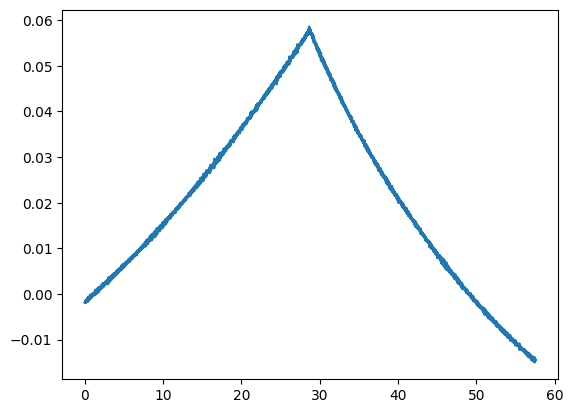

In [13]:
import matplotlib.pyplot as plt

plt.plot(data_df['Time (s)'], data_df['Load (uN)'])
# plt.axvline(x=0.240, color='k')
# plt.axvline(x=57.471, color='k')
# plt.axvline(x=114.703, color='k')
# plt.axvline(x=data_df['Time (s)'][start_idx], color='r')
# plt.axvline(x=data_df['Time (s)'][end_idx], color='r')

In [11]:
plt.plot(data_df['Time (s)'][start_idx:end_idx], data_df['Load (uN)'][start_idx:end_idx])

NameError: name 'start_idx' is not defined

In [8]:
data_df.keys()

Index(['Time (s)', 'Load (uN)', 'Indentation (nm)', 'Cantilever (nm)',
       'Piezo (nm)', 'Auxiliary', 'Z-stage (nm)'],
      dtype='object')

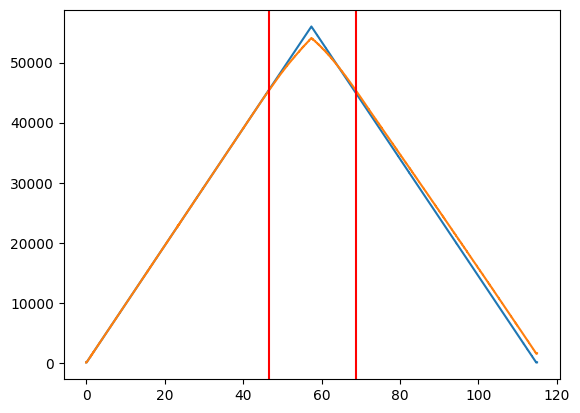

In [9]:
import numpy as np
plt.plot(data_df['Time (s)'], data_df['Piezo (nm)'])
plt.plot(data_df['Time (s)'], data_df['Piezo (nm)'] - data_df['Cantilever (nm)'])
plt.axvline(x=data_df['Time (s)'][start_idx], color='r')
plt.axvline(x=data_df['Time (s)'][end_idx], color='r')

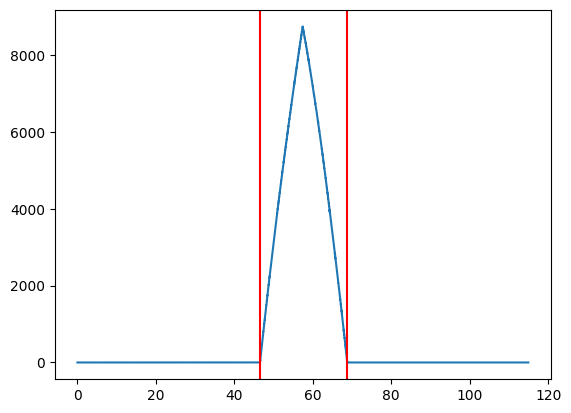

In [10]:
start_idx = 46547
end_idx = 68790

plt.plot(data_df['Time (s)'], data_df['Indentation (nm)'])
plt.axvline(x=data_df['Time (s)'][start_idx], color='r')
plt.axvline(x=data_df['Time (s)'][end_idx], color='r')